In [1]:
import os, sys
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ultranest
import pickle
import time

from general.transformParas import *
import multiprocessing as mp

In [3]:
add_args = {'nu_I':2./60,
            'tau_M':0.01,
            'tau_A':0.001,
            'tau_N':0.150,
            'tau_G':0.005,
            'kappa_E':4.,
            'normalize_height':False
           }

#run = 4  ## prior @ nu_max = 30
#run = 5  ## prior @ nu_max = 15
run = 9 # prior @ nu_max = 15

In [5]:
fileName = 'points_transformed'
for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'

for i in range(13):
    print(i)
    time_start = time.time()
    dirName = f'./logs_animal_{i}/run{run}'
    
    if not os.path.exists(dirName):
        continue
    storeName = os.path.join(dirName,'results',fileName)
    data = {}
    try:
        _,result = ultranest.read_file(dirName,3)
    except:
        print(f'animal {i} not loadable')

0
1
2
3
4
5
6
7
8
9
10
animal 10 not loadable
11
12


In [9]:
fileName = 'points_transformed'
for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'

for i in range(13):
    print(i)
    try:
        f = open(f"./logs_animal_{i}/run{run}/results/{fileName}",'rb')
        data_load = pickle.load(f)
    except:
        print(f'animal {i} could not be opened')
    f.close()

0
1
2
3
4
5
6
7
8
9
10
animal 10 could not be opened
11
12


Keys: <KeysViewHDF5 ['points']>
['points']
<class 'h5py._hl.dataset.Dataset'>
[         -inf          -inf          -inf ... -550.81173439 -550.81173439
 -550.81173439]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 6.10243536e-240
 6.10243536e-240 6.10243536e-240]


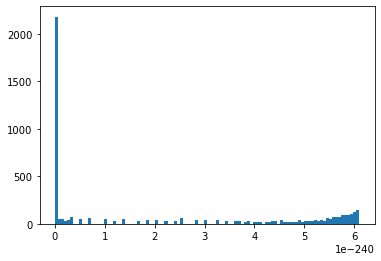

In [58]:
import h5py
fileName = 'points_transformed'
for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'

tP = transformParas()
tP.updateParas(add_args)

i=1
dirName = f'./logs_animal_{i}/run{run}'
fileName = os.path.join(dirName,'results/points.hdf5')

with h5py.File(fileName, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    print(list(f.keys()))

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key]))
    ds_arr = f[a_group_key][()]
#print(ds_arr)
plt.figure()

# 3,6 = gamma (uniform/real)
# 4,7 = delta (uniform/real)
# 5,8 = nu_max (uniform/real)
j=0
x = ds_arr[:,j]
print(x)
x = np.exp(x)
hist_min = max(-1000,np.nanmin(x))
hist_max = min(1000,np.nanmax(x))

print(x)

plt.hist(x,bins=np.linspace(hist_min,hist_max,101))
plt.show()

In [10]:
#add_args = {'nu_I':0.5,'tau_M':0.01,'tau_A':0.003,'tau_N':0.200,'tau_G':0.020,'kappa_E':4.,'normalize_height':False}
fileName = 'points_transformed'
for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'
    
tP = transformParas()
tP.updateParas(add_args)


for i in range(10,11):
    time_start = time.time()
    dirName = f'./logs_animal_{i}/run{run}'
    
    if not os.path.exists(dirName):
        continue
    storeName = os.path.join(dirName,'results',fileName)
    data = {}
    #try:
    _,result = ultranest.read_file(dirName,3)
    data['points'] = result['weighted_samples']['points'][1:-1,:]
    #data['points'][:,2] = 27
    data['weights'] = result['weighted_samples']['weights'][1:-1]
    #except:
    #    f = open(f'./logs_animal_{i}/run{run}/results/points_transformed.pkl','rb')
    #    data = pickle.load(f)
        
    pool = mp.get_context("spawn").Pool(12)
    data['points_transformed'] = np.array(pool.starmap(tP.returnParas,zip(data['points'])))
    
    f = open(storeName,'wb')
    pickle.dump(data,f)
    f.close()
    dt = time.time() - time_start
    print(f"points transformed and stored to {storeName} in t={dt}s")

ValueError: b <= 0

In [8]:
f.close()

In [79]:
a=12
run=8
dirName = f'./logs_animal_{a}/run{run}'
seq,result = ultranest.read_file(dirName,3)

In [80]:
result

{'niter': 5059,
 'logz': -151.02110806191646,
 'logzerr': 0.6663121823681952,
 'logz_bs': -151.0487795705132,
 'logz_single': -151.02110806191646,
 'logzerr_tail': 0.5945603896659577,
 'logzerr_bs': 0.30078209290536506,
 'ess': 1694.5750934083046,
 'H': 5.015345677898296,
 'Herr': 0.18657338601150447,
 'posterior': {'mean': [1.2353178096076787,
   6.198327532981876,
   27.386726347297223],
  'stdev': [0.09074534836517645, 0.4494819865741484, 9.87665891024409],
  'median': [1.2301049327264884, 6.193211945548055, 27.070349820727696],
  'errlo': [1.1448266868297243, 5.763209979426596, 16.997175216033146],
  'errup': [1.3226115947847212, 6.633860506629969, 37.51148731925856],
  'information_gain_bits': [1.5936875884863815,
   -1.0719920646952676,
   -5.114513246968996]},
 'weighted_samples': {'upoints': array([[7.95244119e-01, 1.17170455e-02, 8.14903807e-01],
         [8.92585338e-01, 2.17483840e-04, 5.31960049e-01],
         [6.93596133e-01, 1.48607608e-02, 8.20927964e-01],
         ...,


In [61]:
def p_nu(nu,gamma,delta,nu_max):
    
    #print(f"gamma={gamma}, delta={delta}, nu_max={nu_max}")
    return gamma / ( nu_max * np.sqrt( -np.pi * np.log( nu / nu_max ) ) ) * \
        np.exp( - delta**2/2.) * ( nu / nu_max )**(gamma**2 - 1) * \
        np.cosh( gamma * delta * np.sqrt( -2 * np.log( nu / nu_max) ) )

def nu_mean_from_paras(gamma,delta,nu_max):
    return nu_max * gamma / np.sqrt(gamma**2 + 1) * np.exp(-delta**2 / (2*(1+gamma**2)))

<IPython.core.display.Javascript object>


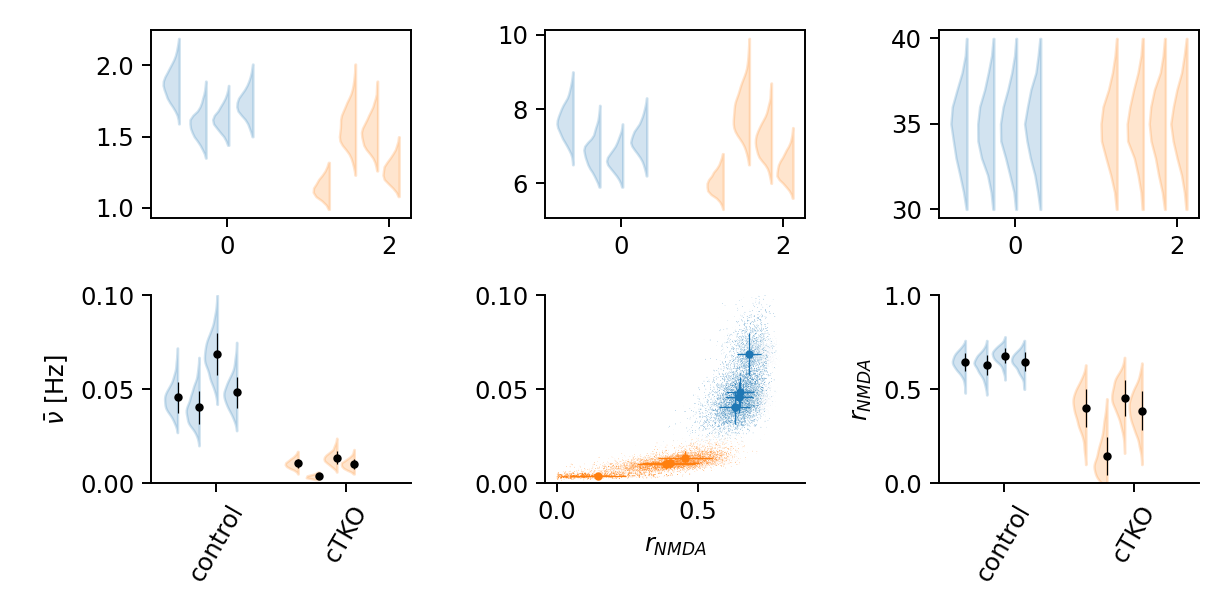

In [62]:
from scipy.stats import gaussian_kde
%matplotlib nbagg

col = ['tab:blue','tab:green','tab:orange']

types = ['APLP1KO','WT','cTKO']#np.unique(types)
type_idx = np.array([0,0,0,0,1,1,1,1,2,2,2,2,2])

#add_args = {'nu_I_scale':1.,'tau_M':0.01,'tau_A':0.006,'tau_N':0.160,'tau_G':0.004,'kappa_E':4.}
#add_args = {'nu_I':0.5,'tau_M':0.01,'tau_A':0.003,'tau_N':0.200,'tau_G':0.020,'kappa_E':4.,'normalize_height':False}
#add_args = {'nu_I':1.,'tau_M':0.01,'tau_A':0.001,'tau_N':0.150,'tau_G':0.005,'kappa_E':4.,'normalize_height':False}

fileName = 'points_transformed'
for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'

fig,ax = plt.subplots(2,3,figsize=(7,3.5))

r_arr = np.linspace(0,1,101)
#tP = transformParas(**(add_args|{'nu_E':0.1}))
#ax[1].plot(r_arr,tP.get_nu_max(r_arr),color=[0.8,0.8,0.8],lw=1,label='$\\bar{\\nu}=0.1$Hz')
#ax[1].plot(r_arr,get_nu_max(**(add_args|{'r':r_arr,'nu':0.5})),color=[0.4,0.4,0.4],lw=1,label='$\\nu=0.5$Hz')
#tP = transformParas(**(add_args|{'nu_E':0.5}))
#ax[1].plot(r_arr,tP.get_nu_max(r_arr),color=[0,0,0],lw=1,label='$\\bar{\\nu}=0.5$Hz')

r_res = []
r_res_silent = []

tau_res = []
tau_res_silent = []


plt_active_only = False
plt_with_silent = True

types_label = ['control','cTKO']

type_ct = np.zeros(len(types))

yLim = 0.1#22

bins_gamma = np.linspace(0,3,101)
bins_delta = np.linspace(0,10,101)
bins_nu_max = np.linspace(0,100,101)

bins_p = np.linspace(0,yLim,101)
bins_p_T = np.linspace(0,1,101)
plot_dist = 0.3
run=9
for i in range(13):
    idx_type = type_idx[i]
    
    if types[idx_type]=='WT':
        continue
    try:
        f = open(f"./logs_animal_{i}/run{run}/results/{fileName}",'rb')
        data_load = pickle.load(f)
    except:
        continue
    #p = data_load['points'][:,2]
    p = data_load['points_transformed'][:,0]
    p_T = data_load['points_transformed'][:,2]
    w = data_load['weights']
    
    nData = len(p)
    
    w /= np.sum(w[~np.isnan(p)])
    
    gamma = data_load['points'][:,0]
    kde_gamma = gaussian_kde(gamma[~np.isnan(p)], bw_method='scott', weights=w[~np.isnan(p)])
    posterior_gamma = kde_gamma(bins_gamma)
    posterior_gamma = posterior_gamma/np.nanmax(posterior_gamma) * 0.2
    posterior_gamma[posterior_gamma<0.005] = np.NaN
    
    delta = data_load['points'][:,1]
    kde_delta = gaussian_kde(delta[~np.isnan(p)], bw_method='scott', weights=w[~np.isnan(p)])
    posterior_delta = kde_delta(bins_delta)
    posterior_delta = posterior_delta/np.nanmax(posterior_delta) * 0.2
    posterior_delta[posterior_delta<0.005] = np.NaN
    
    nu_max = data_load['points'][:,2]
    kde_nu_max = gaussian_kde(nu_max[~np.isnan(p)], bw_method='scott', weights=w[~np.isnan(p)])
    posterior_nu_max = kde_nu_max(bins_nu_max)
    posterior_nu_max = posterior_nu_max/np.nanmax(posterior_nu_max) * 0.2
    posterior_nu_max[posterior_nu_max<0.005] = np.NaN
    
    
    #rvs = np.append(gamma[:,np.newaxis],delta[:,np.newaxis],axis=1)
    #kde = gaussian_kde(rvs.T)
    #x,y = np.meshgrid(bins_gamma,bins_delta)
    #grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    #z = kde(grid_coords.T)
    #ax[0][2].imshow(z.reshape(101,101))
    
    
    #p = data_load['points_transformed'][:,0]
    
    p_mean = np.nansum(p*w)/np.sum(w[~np.isnan(p)])
    p_var = np.sqrt(np.nansum(p**2*w) - p_mean**2)
    
    w /= np.sum(w[~np.isnan(p_T)])
    p_T_mean = np.nansum(p_T*w)
    p_T_var = np.sqrt(np.nansum(p_T**2*w) - p_T_mean**2)
    
    #ax[0][2].scatter(gamma,delta,color=col[idx_type],s=w*300)
    
    nAnimals = (type_idx==idx_type).sum()
    x_pos = idx_type - nAnimals/2*plot_dist + type_ct[idx_type]*plot_dist + np.random.randn(nData)*0.025
    
    kde_p = gaussian_kde(p[~np.isnan(p)], bw_method='scott', weights=w[~np.isnan(p)])
    posterior_p = kde_p(bins_p)
    posterior_p = posterior_p/np.nanmax(posterior_p) * 0.2
    posterior_p[posterior_p<0.005] = np.NaN
    
    ax[0][0].fill_betweenx(bins_gamma,x_pos[0]-posterior_gamma,x_pos[0],color=col[idx_type],alpha=0.2)
    ax[0][1].fill_betweenx(bins_delta,x_pos[0]-posterior_delta,x_pos[0],color=col[idx_type],alpha=0.2)
    ax[0][2].fill_betweenx(bins_nu_max,x_pos[0]-posterior_nu_max,x_pos[0],color=col[idx_type],alpha=0.2)
    
    
    ax[1][0].fill_betweenx(bins_p,x_pos[0]-posterior_p,x_pos[0],color=col[idx_type],alpha=0.2)
    #ax[0].fill_betweenx(bins_p,x_pos[0]+posterior_p,x_pos[0],color=col[idx_type],alpha=0.2)
    
    ax[1][0].scatter(x_pos[0],p_mean,s=6,c='k')
    ax[1][0].errorbar(x_pos[0],p_mean,p_var,color='k',linewidth=0.5)
    
    
    ax[1][1].scatter(p_T,p,s=w*300,c=col[idx_type],marker='.',linewidth=0,facecolor='r')
    
    ax[1][1].scatter(p_T_mean,p_mean,s=6,c=col[idx_type])
    ax[1][1].errorbar(p_T_mean,p_mean,p_var,p_T_var,color=col[idx_type],linewidth=0.5)
    #continue
    #print(p_T[~np.isnan(p_T)])
    #print(w[~np.isnan(p_T)])
    
    kde_p_T = gaussian_kde(p_T[~np.isnan(p_T)], bw_method='scott', weights=w[~np.isnan(p_T)])
    posterior_p_T = kde_p_T(bins_p_T)
    posterior_p_T = posterior_p_T/np.nanmax(posterior_p_T) * 0.2
    posterior_p_T[posterior_p_T<0.005] = np.NaN
    
    ax[1][2].fill_betweenx(bins_p_T,x_pos[0]-posterior_p_T,x_pos[0],color=col[idx_type],alpha=0.2)
    #ax[2].fill_betweenx(bins_p_T,x_pos[0]+posterior_p_T,x_pos[0],color=col[idx_type],alpha=0.2)
    
    ax[1][2].scatter(x_pos[0],p_T_mean,s=6,c='k')
    ax[1][2].errorbar(x_pos[0],p_T_mean,p_T_var,color='k',linewidth=0.5)
    
    type_ct[idx_type] += 1

plt.setp(ax[1][0],xlim=[-1,3],ylim=[0,yLim],
         ylabel='$\\bar{\\nu}$ [Hz]',
         #xticks=range(len(types_unq_label)),
         xticks=[0,2],
         xticklabels=types_label)
#plt.setp(ax[1],xlim=[0,ax[1].get_xlim()[1]],ylim=[0,ax[0].get_ylim()[1]],xlabel='$\\tau_I$')
plt.setp(ax[1][1],ylim=[0,yLim],xlabel='$r_{NMDA}$')
plt.setp(ax[1][2],xlim=[-1,3],ylim=[0,1],
         ylabel='$r_{NMDA}$',
         #xticks=range(len(types_unq_label)),
         xticks=[0,2],
         xticklabels=types_label)
plt.setp(ax[1][0].get_xticklabels(), rotation=60)
plt.setp(ax[1][2].get_xticklabels(), rotation=60)

ax[1][0].spines[['top','right']].set_visible(False)
ax[1][1].spines[['top','right']].set_visible(False)
ax[1][2].spines[['top','right']].set_visible(False)

#ax[0].legend()
#ax[1].legend()
#ax[1].set_title('single synapse',fontsize=10)
#ax[1].set_title('mixed synapses',fontsize=10)
#ax[1].legend()
plt.tight_layout()
#fig.savefig("../figures/Busche_inference_results_new.pdf", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


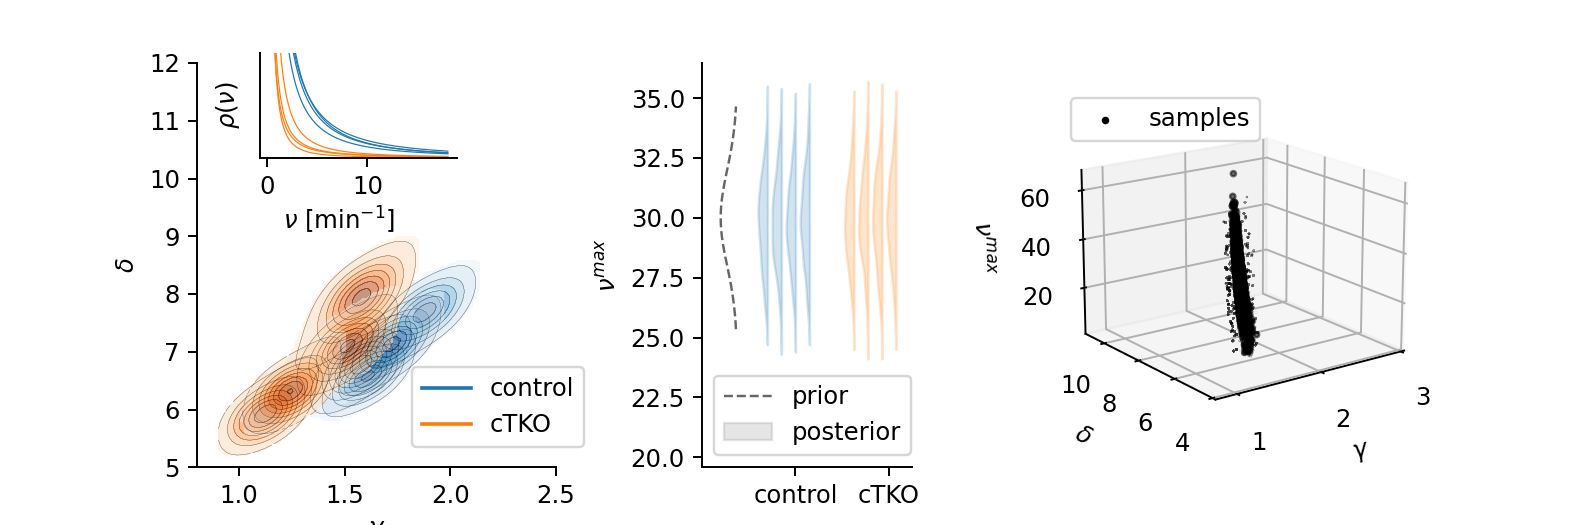

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/empirical/model.py:4: RuntimeWarning: divide by zero encountered in log
  scaled_NU = np.log(NU / nu_max)
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/empirical/model.py:5: RuntimeWarning: invalid value encountered in multiply
  return gamma / ( nu_max * np.sqrt( -np.pi * scaled_NU ) ) * \


In [108]:
from scipy.stats import norm

a=12
run = 9

add_args = {'nu_I':2.0/60,
            #'tau_M':0.01,'tau_A':0.006,'tau_N':0.200,'tau_G':0.004,'kappa_E':4.,
            'tau_M':0.01,'tau_A':0.001,'tau_N':0.150,'tau_G':0.005,'kappa_E':4.,
            'normalize_height':False
           }

fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(1,3,1)
#ax_3d_2 = fig.add_subplot(1,3,3,projection='3d')
ax_nu_max = fig.add_subplot(1,5,3)
ax_rho = fig.add_subplot(2,6,8)
ax_rho.set_position([0.165,0.7,0.125,0.2])
ax_3d = fig.add_subplot(1,3,3,projection='3d')

bins_nu_max = np.linspace(0,100,1001)
if True:
    a = 0
    run = 8
    fileName = 'points_transformed'
    for key,val in add_args.items():
        fileName += f"_{key}={val}"
    fileName += '.pkl'
    f = open(f"./logs_animal_{a}/run{run}/results/{fileName}",'rb')
    data_load = pickle.load(f)

    gamma,delta,nu_max = data_load['points'].T
    im = ax_3d.scatter(gamma,delta,nu_max,'k',
           c='k',
           #c=data_load['points_transformed'][:,0],cmap='coolwarm',
           s=data_load['weights']**2*10**7,vmin=0.00,vmax=0.03,label='samples')

    #im = ax_3d.scatter(gamma,delta,nu_max,'k',
    #       c=col[0],
    #       #c=data_load['points_transformed'][:,0],cmap='coolwarm',
    #       s=data_load['weights']**2*10**7,vmin=0.00,vmax=0.03)
    ax_3d.view_init(elev=17., azim=-126)
    #ax_3d.view_init(elev=17., azim=-45)

    #cax = plt.axes([0.925, 0.1, 0.025, 0.8])
    #plt.colorbar(im,cax=cax)

    #for ax3 in [ax_3d,ax_3d_2]:
    ax_3d.set_xlabel('$\gamma$')
    ax_3d.set_ylabel('$\delta$')
    ax_3d.set_zlabel('$\\nu^{max}$')
    plt.setp(ax_3d,
             xlim=[0.8,3],
             ylim=[4,11],
             #zlim=[20,32]
            )

nu_arr = np.linspace(0,0.3,101)
plot_dist = 0.3
type_ct = np.zeros(len(types))

loc = 30
scale = 2
x = np.linspace(norm.ppf(0.01,loc,scale),
                norm.ppf(0.99,loc,scale), 100)
ax_nu_max.plot(-1.25 - 1.75*norm.pdf(x,loc,scale),x,
       'k--', lw=1, alpha=0.6, label='prior')
ax_nu_max.fill_betweenx(x-5,-10,-10,color='grey',alpha=0.2,label='posterior')

run = 9
for a in range(0,13):
    idx_type = type_idx[a]
    if types[idx_type]=='WT':
        continue
    nAnimals = (type_idx==idx_type).sum()
    
    try:
        fileName = 'points_transformed'
        for key,val in add_args.items():
            fileName += f"_{key}={val}"
        fileName += '.pkl'
        f = open(f"./logs_animal_{a}/run{run}/results/{fileName}",'rb')
        data_load = pickle.load(f)
    except:
        continue
    gamma,delta,nu_max = data_load['points'].T
    w = data_load['weights']
    
    gamma_mean = np.sum(gamma*w)
    delta_mean = np.sum(delta*w)
    nu_max_mean = np.sum(nu_max*w)
    
    #nu_max = data_load['points'][:,2]
    kde_nu_max = gaussian_kde(nu_max[~np.isnan(nu_max)], bw_method='scott', weights=w[~np.isnan(nu_max)])
    posterior_nu_max = kde_nu_max(bins_nu_max)
    posterior_nu_max = posterior_nu_max/np.nanmax(posterior_nu_max) * 0.2
    posterior_nu_max[posterior_nu_max<0.005] = np.NaN
    
    x_pos = idx_type - nAnimals/2*plot_dist + type_ct[idx_type]*plot_dist #+ np.random.randn(nData)*0.025
    ax_nu_max.fill_betweenx(bins_nu_max-5,x_pos-posterior_nu_max,x_pos,color=col[idx_type],alpha=0.2)
    
    
    
    xx, yy = np.mgrid[0.8:2.5:100j, 5:10:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([gamma, delta])
    kernel = gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    f[f<np.max(f)*0.1] = np.NaN

    if types[idx_type]=='cTKO':
        cmap_ = 'Oranges'
    else:
        cmap_ = 'Blues'
    cfset = ax.contourf(xx, yy, f, cmap=cmap_,alpha=0.5)
    cset = ax.contour(xx, yy, f, colors='k',linewidths=0.1)
    
    ax_rho.plot(nu_arr*60,p_nu(nu_arr,gamma_mean,delta_mean,nu_max_mean),'-',lw=0.5,color=col[type_idx[a]])
    type_ct[idx_type] += 1
ax.plot(0,np.NaN,color='tab:blue',label=types_label[0])
ax.plot(0,np.NaN,color='tab:orange',label=types_label[1])

ax_3d.legend()

ax_nu_max.legend(loc='lower left')
plt.setp(ax_nu_max,xlim=[-2,2.5],xticks=[0,2],xticklabels=['control','cTKO'],ylabel='$\\nu^{max}$')
ax_nu_max.spines[['top','right']].set_visible(False)

plt.setp(ax,xlabel='$\gamma$',ylabel='$\delta$',ylim=[5,12])
ax.legend(loc=[0.6,0.05])
ax.spines[['top','right']].set_visible(False)

plt.setp(ax_rho,ylim=[0,3],yticks=[],xlabel='$\\nu$ [min$^{-1}$]',ylabel='$\\rho(\\nu)$')
ax_rho.spines[['top','right']].set_visible(False)
ax_rho.xaxis.set_label_coords(.4, -.45)
#ax[0][1].hist(nu_max,bins=np.linspace(0,50,101),weights=data_load['weights'])

#ax[1][1].hist(data_load['points_transformed'][:,2],bins=np.linspace(0,1,101),weights=data_load['weights'])
#plt.tight_layout()
fig.savefig("../figures/inferred_parameter_control_vs_cTKO.pdf", bbox_inches='tight')
plt.show()


<IPython.core.display.Javascript object>


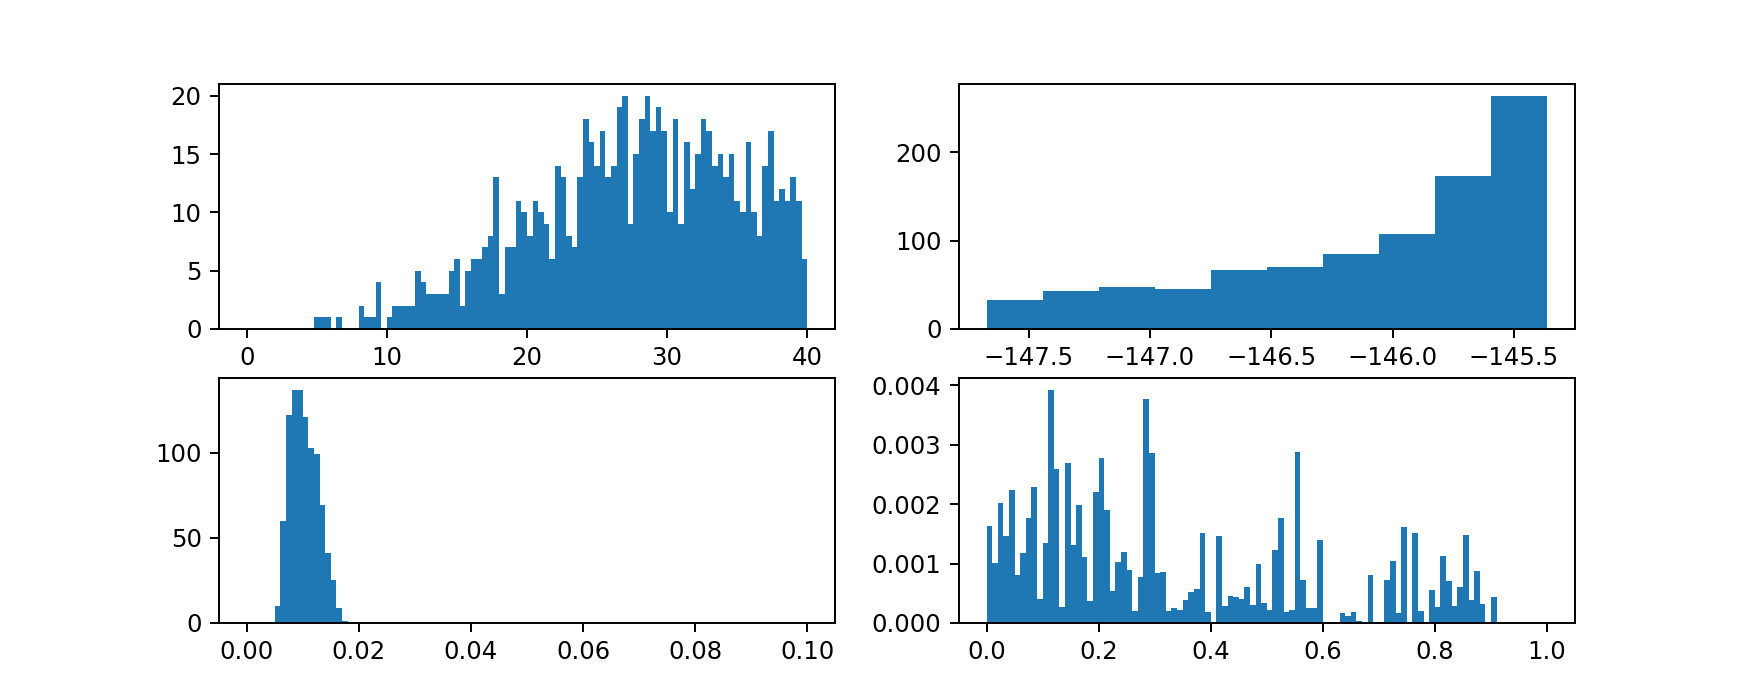

In [85]:
fig,ax = plt.subplots(2,2,figsize=(10,4))
w = result['weighted_samples']['weights']
points = result['weighted_samples']['points']
logl = result['weighted_samples']['logl']
ax[0][0].hist(points[w > w.max()*0.5,2],bins=np.linspace(0,40,101))
ax[0][1].hist(logl[w > w.max()*0.5])#,bins=np.linspace(0,40,101))
nu_mean = nu_mean_from_paras(*(points[w>w.max()*0.5].T))


fileName = 'points_transformed'
add_args = {'nu_I':1.0,
            #'tau_M':0.01,'tau_A':0.006,'tau_N':0.200,'tau_G':0.004,'kappa_E':4.,
            'tau_M':0.01,'tau_A':0.001,'tau_N':0.150,'tau_G':0.005,'kappa_E':4.,
            'normalize_height':False
           }

for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'
f = open(f"./logs_animal_{a}/run{run}/results/{fileName}",'rb')
data_load = pickle.load(f)

ax[1][0].hist(data_load['points_transformed'][data_load['weights']>w.max()*0.5,0],bins=np.linspace(0,0.1,101))

## plot distribution along slice of nu_max 
interval = [10,40]
idx = np.logical_and(data_load['points'][:,2] > interval[0],data_load['points'][:,2] < interval[1])
ax[1][1].hist(data_load['points_transformed'][idx,2],weights=data_load['weights'][idx],bins=np.linspace(0,1,101))

plt.show()

In [137]:
data_load['points_transformed'][:,2]

array([0.12440011,        nan, 0.02503483, ..., 0.70469938,        nan,
              nan])

In [119]:
data_load['points_transformed'][:,0]

array([31.95891472, 29.32185887, 26.54242129, ...,  0.03991843,
        0.04176327,  0.04082084])

<IPython.core.display.Javascript object>


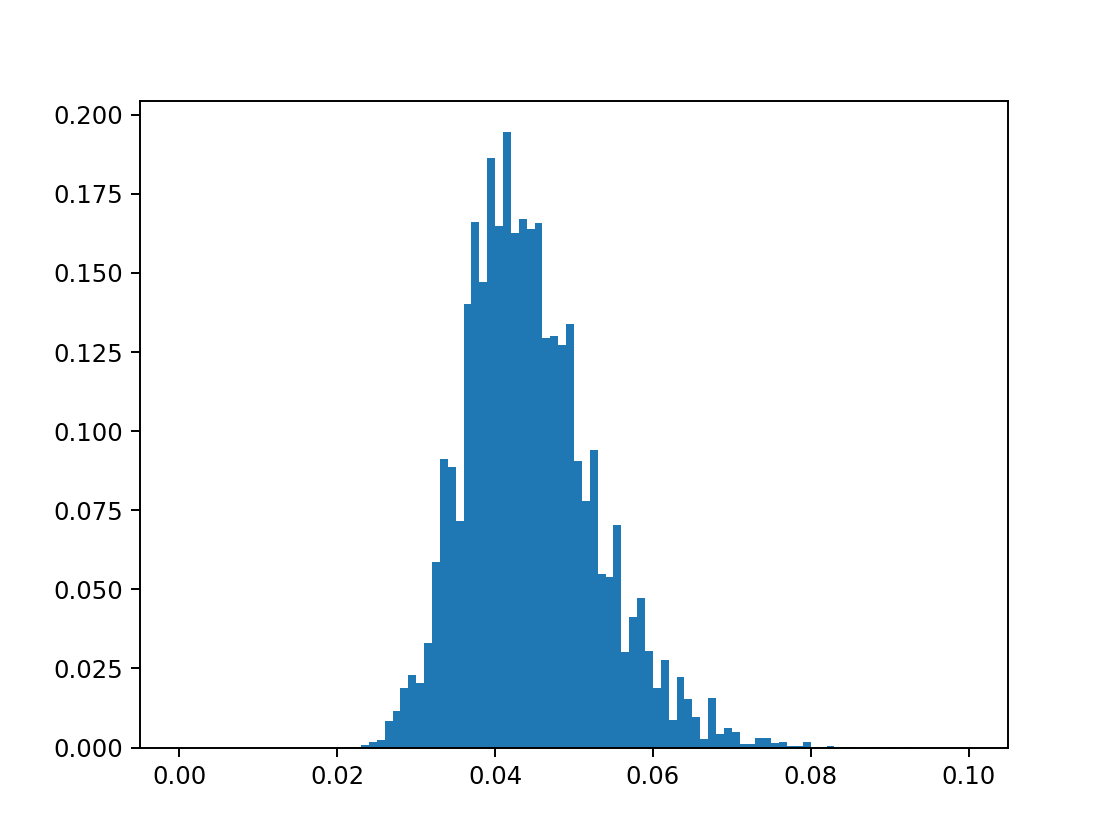

In [120]:
plt.figure()
#plt.hist(data_load['points'][:,2],np.linspace(0,100,101),weights=data_load['weights'])
plt.hist(data_load['points_transformed'][:,0],np.linspace(0,0.1,101),weights=data_load['weights'])
plt.show()

In [ ]:
fileName = 'points_transformed'
for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'

ncols = 5
nrows = 3
fig,ax = plt.subplots(nrows,ncols,figsize=(10,6))

for a in range(13):
    try:
        f = open(f"./logs_animal_{a}/run{run}/results/{fileName}",'rb')
        data_load = pickle.load(f)
    except:
        continue
    
    p = data_load['points'][:,2]
    p_T = data_load['points_transformed'][:,2]
    w = data_load['weights']
    
    mask = np.isnan(p_T)
    print(f"weight of unused data (animal {a}): {w[mask].sum()}")
    
    ax[a//ncols][a%ncols].hist(p,weights=w,bins=np.linspace(0,90,101))
    ax[a//ncols][a%ncols].hist(p[mask],weights=w[mask],bins=np.linspace(0,90,101))
    
#    ax[a//ncols][a%ncols].hist(p_T,weights=w,bins=np.linspace(0,1,101))
#    ax[a//ncols][a%ncols].hist(p_T[mask],weights=w[mask],bins=np.linspace(0,1,101))
plt.show()

In [120]:
nu_max = 35
add_args = {'nu_I':2./60,'tau_M':0.01,'tau_A':0.001,'tau_N':0.150,'tau_G':0.020,'kappa_E':4.,'normalize_height':False}
tP = transformParas(**(add_args|{'nu_E':1.5/60,'nu_max':nu_max}))
tP.get_r_NMDA()


#ax[1].plot(r_arr,tP.get_nu_max(r_arr),color=[0.8,0.8,0.8],lw=1,label='$\\bar{\\nu}=0.1$Hz')

0.6087782314763971

In [105]:
mP = ModelParams('empirical', filePath=f'../../data/BuscheLab/2P_data.xlsx', population_keys=['*mouse_type','animal'])
data_df = mP.regularize_rates()
data_df /= 60.
data = data_df.to_numpy()

nu_means = np.nanmean(data[:,type_idx==2],axis=0)
print(nu_means)
np.std(nu_means)

column names: [['WT', '20180310A'], ['WT', '20180312A'], ['WT', '20180310B'], ['WT', '20180401'], ['LM (APLP1 KO)', '20180325 (app ko7 739)'], ['LM (APLP1 KO)', '20180325A (app ko8 740)'], ['LM (APLP1 KO)', '20180402A (app ko13 734)'], ['LM (APLP1 KO)', '20180419 (app ko14 756)'], ['cTKO', '20180309'], ['cTKO', '20180310'], ['cTKO', '20180311'], ['cTKO', '20180329'], ['cTKO', '20180329A']]
[0.00504008 0.00245684 0.00999529 0.00798596 0.00542036]


0.0025906081003576244

<IPython.core.display.Javascript object>


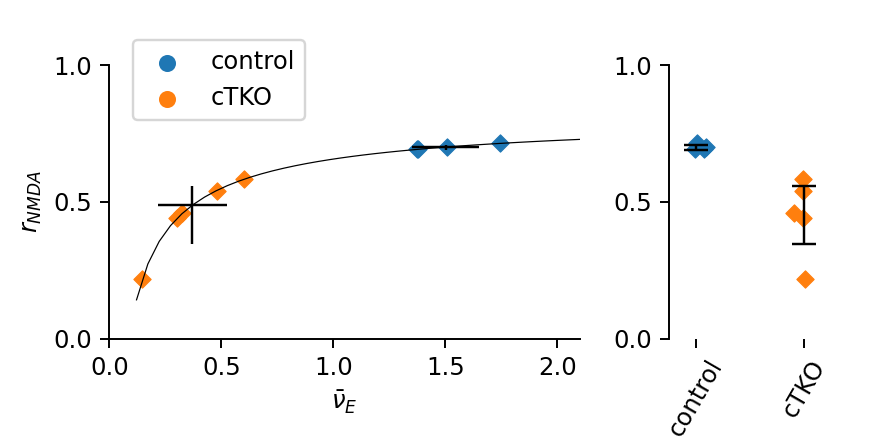

r: 0.690118662468126 0.7090066694733445
r: 0.34553667715941594 0.5590682956599967


/tmp/ipykernel_56547/1667965912.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [107]:
from empirical.model import *
from inference import *

add_args = {'nu_I':2./60,'tau_M':0.01,'tau_A':0.001,'tau_N':0.150,'tau_G':0.005,'kappa_E':4.,'normalize_height':False}

fig = plt.figure(figsize=(5,2.5))

gs = fig.add_gridspec(1, 3,  #width_ratios=(3, 1), height_ratios=(1, 3),
          left=0.125, right=0.95, bottom=0.225, top=0.85,
          wspace=0.15, hspace=0.1)
gs2 = fig.add_gridspec(1, 4,
          left=0.125, right=0.95, bottom=0.225, top=0.85,
          wspace=0.15, hspace=0.1)

ax = fig.add_subplot(gs[0, 0:2])
ax_r = fig.add_subplot(gs2[0, 3])

nsteps = 50
nu_E_arr = np.linspace(1/nsteps,2.5,nsteps)
for i,nu_max in enumerate([30]):
    c = [i/2.5,i/2.5,i/2.5]
    
    r_arr = np.zeros_like(nu_E_arr)
    for i,nu_E in enumerate(nu_E_arr):
        tP = transformParas(**(add_args|{'nu_E':nu_E/60,'nu_max':nu_max}))
        r_arr[i] = tP.get_r_NMDA()
    ax.plot(nu_E_arr,r_arr,'-',color=c,lw=0.5)#,label='$\\nu^{max}=%i\,$Hz'%nu_max)

#col = ['']
col = ['tab:blue','tab:green','tab:orange']
nu_max = 30
run=9
r_arr = np.zeros(13)

nu_E = np.nanmean(data,axis=0)

for a in range(0,13):
    
    idx_type = type_idx[a]
    if types[idx_type]=='WT':
        continue
    
    #try:
    #    fileName = 'points_transformed'
    #    for key,val in add_args.items():
    #        fileName += f"_{key}={val}"
    #    fileName += '.pkl'
    #    f = open(f"./logs_animal_{a}/run{run}/results/{fileName}",'rb')
    #    data_load = pickle.load(f)
    #except:
    #    continue
    #nu_m = data_load['points_transformed'][:,0]
    #w = data_load['weights']
    #nu_E = np.sum(nu_m*w)
    
    #tP = transformParas(**(add_args|{'nu_E':nu_E,'nu_max':nu_max}))
    #r = tP.get_r_NMDA()
    #ax.scatter(nu_E*60,r,s=25,c=col[idx_type])
    
    #nu_E = np.nanmean(data[:,a])
    #nu_E_SD = np.nanstd(data[:,a])
    
    tP = transformParas(**(add_args|{'nu_E':nu_E[a],'nu_max':nu_max}))
    r_arr[a] = tP.get_r_NMDA()
    
    #tP = transformParas(**(add_args|{'nu_E':nu_E+nu_E_SD,'nu_max':nu_max}))
    #r_upper = tP.get_r_NMDA()
    #if (nu_E_SD > nu_E):
    #    r_lower = 0
    #else:
    #    tP = transformParas(**(add_args|{'nu_E':nu_E-nu_E_SD,'nu_max':nu_max}))
    #    r_lower = tP.get_r_NMDA()
    
    #print('nu_E:',nu_E,nu_E-nu_E_SD,nu_E+nu_E_SD)
    #print('r:',np.array([r-r_lower,r_upper-r]))
    
    
for d,j in enumerate([0,2]):
    
    idxs = type_idx == j
    ax.scatter(nu_E[idxs]*60,r_arr[idxs],s=25,c=col[j],marker='D',facecolors='none',linewidth=0.5)
    
    #nu_means = np.nanmean(data[:,type_idx==j],axis=0)
    nu_SD = np.std(nu_E[idxs])
    nu_mean = np.mean(nu_E[idxs])
    
    tP = transformParas(**(add_args|{'nu_E':nu_mean,'nu_max':nu_max}))
    r = tP.get_r_NMDA()
    
    tP = transformParas(**(add_args|{'nu_E':nu_mean+nu_SD,'nu_max':nu_max}))
    r_upper = tP.get_r_NMDA()
    if (nu_SD > nu_mean):
        r_lower = 0
    else:
        tP = transformParas(**(add_args|{'nu_E':nu_mean-nu_SD,'nu_max':nu_max}))
        r_lower = tP.get_r_NMDA()
    print('r:',r_lower,r_upper)
    ax.errorbar(nu_mean*60,r,np.array([[r-r_lower],[r_upper-r]]),nu_SD*60,color='k',lw=1.)#,col[j])
    ax.scatter(0,np.nan,c=col[j],label=types_label[d])
    
    ax_r.scatter(j*np.ones(idxs.sum())+np.random.randn(idxs.sum())*0.1,r_arr[idxs],s=25,c=col[j],marker='D',facecolors='none',linewidth=0.5)
    ax_r.errorbar(j,r,np.array([[r-r_lower],[r_upper-r]]),color='k',lw=1., capsize=5)#,col[j])
    
plt.setp(ax,xlim=[0,2.1],ylim=[0,1],xlabel='$\\bar{\\nu}_E$',ylabel='$r_{NMDA}$',yticks=np.linspace(0,1,3))
ax.legend(loc=[0.05,0.8])
ax.spines[['top','right']].set_visible(False)

plt.setp(ax_r,xlim=[-0.5,2.5],ylim=[0,1],xticks=[0,2],xticklabels=types_label,yticks=np.linspace(0,1,3))
plt.setp(ax_r.get_xticklabels(), rotation=60)
ax_r.spines[['top','right','bottom']].set_visible(False)

plt.tight_layout()
fig.savefig("../figures/r_NMDA.pdf", bbox_inches='tight')
plt.show()

In [230]:
from scipy.stats import ttest_ind
ttest_ind(r_arr[type_idx==0],r_arr[type_idx==2],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=3.977009858458518, pvalue=0.016025129108673545)

In [98]:
from empirical.model import *
from inference import *

mP = ModelParams('empirical', filePath=f'../../data/BuscheLab/2P_data.xlsx', population_keys=['*mouse_type','animal'])
data_df = mP.regularize_rates()
data_df /= 60.
data = data_df.to_numpy()

column names: [['WT', '20180310A'], ['WT', '20180312A'], ['WT', '20180310B'], ['WT', '20180401'], ['LM (APLP1 KO)', '20180325 (app ko7 739)'], ['LM (APLP1 KO)', '20180325A (app ko8 740)'], ['LM (APLP1 KO)', '20180402A (app ko13 734)'], ['LM (APLP1 KO)', '20180419 (app ko14 756)'], ['cTKO', '20180309'], ['cTKO', '20180310'], ['cTKO', '20180311'], ['cTKO', '20180329'], ['cTKO', '20180329A']]


In [95]:
a = 0
run = 8

fileName = 'points_transformed'
add_args = {'nu_I':1.0,
            #'tau_M':0.01,'tau_A':0.006,'tau_N':0.200,'tau_G':0.004,'kappa_E':4.,
            'tau_M':0.01,'tau_A':0.001,'tau_N':0.150,'tau_G':0.005,'kappa_E':4.,
            'normalize_height':False
           }

for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'
f = open(f"./logs_animal_{a}/run{run}/results/{fileName}",'rb')
data_load = pickle.load(f)

*mouse_type          LM (APLP1 KO)                          \
animal      20180325 (app ko7 739) 20180325A (app ko8 740)   
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
..                             ...                     ...   
365                            NaN                     NaN   
366                            NaN                     NaN   
367                            NaN                     NaN   
368                            NaN                     NaN   
369                            NaN                     NaN   

*mouse_type                                                         WT  \
animal      20180402A (app ko13 734) 20180419 (app ko14 756) 20180310A   
0                                0.0                     0.0       0.0   
1                                0.0                     0.0       0.0   
2                                0.0                     0.0       0.0   
3                                0.0                     0.0       0.0   
4                                0.0                     0.0       0.0   
..                               ...                     ...       ...   
365                              NaN                     NaN       NaN   
366                              NaN                     NaN       NaN   
367                              NaN                     NaN       NaN   
368                              NaN                     NaN       NaN   
369                              NaN                     NaN       NaN   

*mouse_type                                  cTKO                              \
animal      20180310B 20180312A 20180401 20180309 20180310  20180311 20180329   
0                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
1                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
2                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
3                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
4                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
..                ...       ...      ...      ...      ...       ...      ...   
365               NaN       NaN      NaN      NaN      NaN  0.102564      NaN   
366               NaN       NaN      NaN      NaN      NaN  0.102564      NaN   
367               NaN       NaN      NaN      NaN      NaN  0.115385      NaN   
368               NaN       NaN      NaN      NaN      NaN  0.121795      NaN   
369               NaN       NaN      NaN      NaN      NaN  0.134615      NaN   

*mouse_type            
animal      20180329A  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
..                ...  
365               NaN  
366               NaN  
367               NaN  
368               NaN  
369               NaN  

[370 rows x 13 columns]

<IPython.core.display.Javascript object>


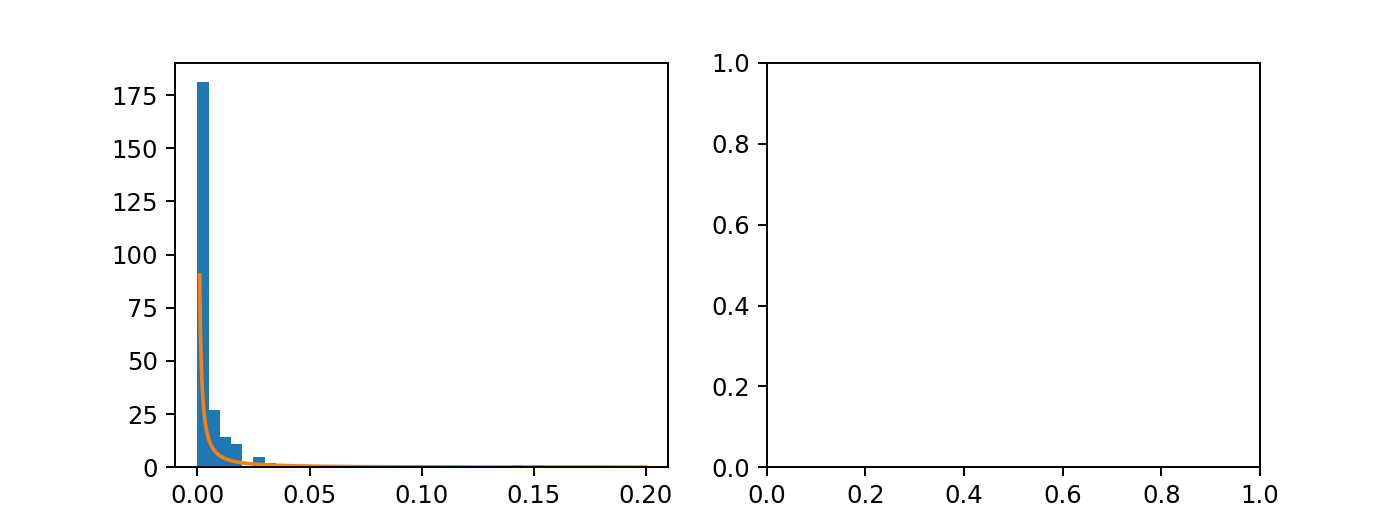

In [116]:
fig,ax = plt.subplots(1,2,figsize=(8,3))
nsteps = 1001
nu_array = np.linspace(1/nsteps,0.2,nsteps)
ax[0].hist(data[:,a],bins=np.linspace(0,0.2,41))

gamma,delta,nu_max = np.sum(data_load['points']*data_load['weights'][:,np.newaxis],axis=0)
#print(np.sum(delta*w))
ax[0].plot(nu_array,p_nu(nu_array,gamma,delta,nu_max))
plt.show()